In [46]:
# %pip install matplotlib
# %pip install seaborn
# %pip install tabulate

In [47]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tabulate import tabulate
import math 

url_events = "https://flipquest-9db7e-default-rtdb.firebaseio.com/events.json"
url_sessions = "https://flipquest-9db7e-default-rtdb.firebaseio.com/sessions.json"

events_data = requests.get(url_events).json()
sessions_data = requests.get(url_sessions).json()


Flips per Level Data (Sorted by Level
+----+-------+-------+
|    | Level | Flips |
+----+-------+-------+
| 5  |   1   |   3   |
| 4  |   1   |   4   |
| 27 |   1   |   0   |
| 28 |   1   |   1   |
| 33 |   1   |   9   |
| 32 |   1   |   2   |
| 6  |   2   |   0   |
| 7  |   2   |  12   |
| 12 |   2   |   4   |
| 13 |   2   |   6   |
| 10 |   2   |   2   |
| 11 |   2   |   4   |
| 14 |   2   |   2   |
| 15 |   2   |   4   |
| 1  |   2   |   0   |
| 2  |   2   |   2   |
| 24 |   2   |   4   |
| 29 |   2   |   6   |
| 17 |   2   |   8   |
| 18 |   2   |   2   |
| 23 |   2   |   4   |
| 21 |   2   |   2   |
| 22 |   2   |   5   |
| 8  |   2   |   2   |
| 9  |   2   |   0   |
| 20 |   3   |  15   |
| 3  |   3   |  11   |
| 19 |   3   |   4   |
| 26 |   3   |  17   |
| 25 |   3   |   2   |
| 16 |   3   |   9   |
| 0  |   3   |   6   |
| 31 |   3   |   9   |
| 30 |   3   |   4   |
+----+-------+-------+


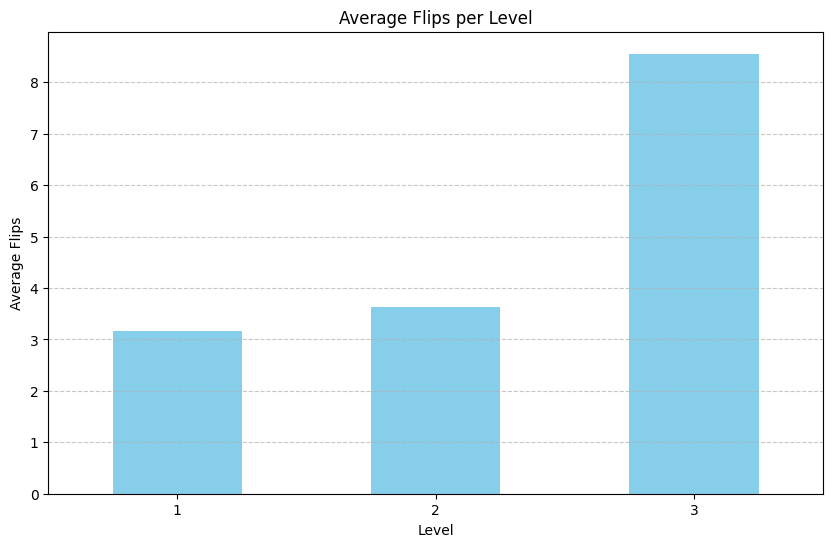

In [48]:
# Initialize list to store level and flip data
flips_per_level = []

# Process each event in the events data
for event in events_data.values():
    level_index = event.get('level_index')  # Extract the level index
    session_id = event.get('session_id')  # Extract the session ID
    flips = event.get('flips')  # Extract flips value
    finished = event.get('finish')  # Check if the level was completed (finish = True)

    # Include valid level indices but exclude specific entries
    if level_index in [4, 5, 6]:  # Only consider levels 4, 5, and 6
            # Check if flips is valid and the level was completed (finish = True)
            if (
                flips is not None  # Exclude None values
                and not (isinstance(flips, str) and flips.lower() in ['nan', 'na'])  # Exclude 'nan'/'na' strings
                and not math.isnan(flips)  # Exclude numeric NaN values
            ):
                # Map level_index to Level 1, 2, and 3
                level = level_index - 3
                flips_per_level.append((level, flips))

# Convert the collected data to a DataFrame
df_flips = pd.DataFrame(flips_per_level, columns=['Level', 'Flips'])

# Sort the DataFrame by Level
df_flips = df_flips.sort_values(by='Level')

# Beautify and print the sorted DataFrame
print("Flips per Level Data (Sorted by Level")
print(tabulate(df_flips, headers='keys', tablefmt='pretty'))

# Calculate average flips per level
avg_flips_per_level = df_flips.groupby('Level')['Flips'].mean()

# Plot the average flips per level
plt.figure(figsize=(10, 6))
avg_flips_per_level.plot(kind='bar', color='skyblue')
plt.title("Average Flips per Level")
plt.xlabel("Level")
plt.ylabel("Average Flips")
plt.xticks(rotation=0)  # Ensure level labels are horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

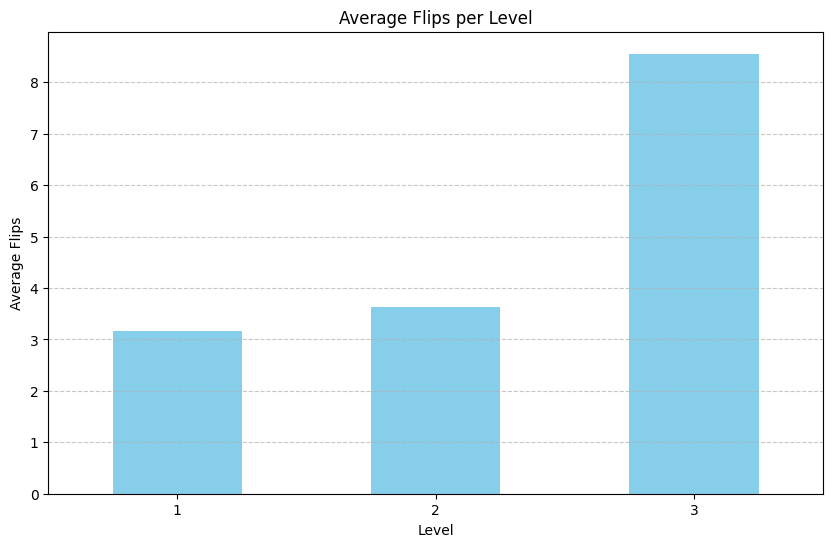

In [49]:
flips_per_level = []
for event in events_data.values():
    level_index = event.get('level_index')
    session_id = event.get('session_id')  # Assuming session_id is available in each event
    
    # Include all valid level indices but exclude specific level_index == 4 and session_id
    if level_index in [4, 5, 6]:
        if not (level_index == 4 and session_id == "ccbf94f7-2754-4870-a460-7fcaa6fa1070"):
            level = level_index - 3
            flips = event.get('flips')
            flips_per_level.append((level, flips))

# Convert to DataFrame
df_flips = pd.DataFrame(flips_per_level, columns=['Level', 'Flips'])

# Calculate average flips per level
avg_flips_per_level = df_flips.groupby('Level')['Flips'].mean()

# Plot the average flips per level
plt.figure(figsize=(10, 6))
avg_flips_per_level.plot(kind='bar', color='skyblue')
plt.title("Average Flips per Level")
plt.xlabel("Level")
plt.ylabel("Average Flips")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

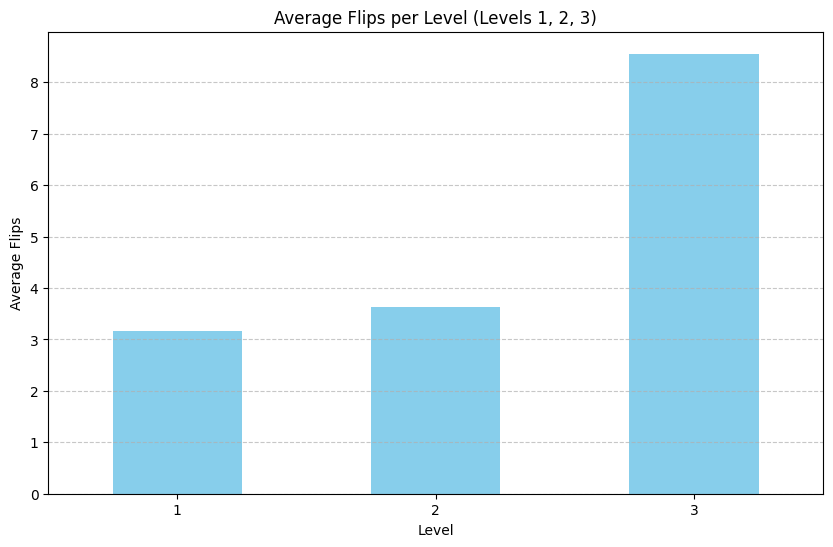

In [50]:

flips_per_level = []
for event in events_data.values():
    level_index = event.get('level_index')
    if level_index in [4, 5, 6]:  
        
        level = level_index - 3
        flips = event.get('flips')
        flips_per_level.append((level, flips))


df_flips = pd.DataFrame(flips_per_level, columns=['Level', 'Flips'])
avg_flips_per_level = df_flips.groupby('Level')['Flips'].mean()


plt.figure(figsize=(10, 6))
avg_flips_per_level.plot(kind='bar', color='skyblue')
plt.title("Average Flips per Level (Levels 1, 2, 3)")
plt.xlabel("Level")
plt.ylabel("Average Flips")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Filtered Completion Data DataFrame:
     Level Completed
220      3     False
222      2     False
223      2      True
224      3      True
225      1     False
226      1      True
227      2     False
228      2     False
229      2     False
230      2     False
231      2     False
232      2      True
233      2      True
234      2     False
235      2      True
238      2      True
239      3      True
241      2     False
242      2      True
245      3     False
246      3      True
249      2     False
250      2     False
253      2     False
254      2      True
255      3     False
256      3      True
257      1     False
258      1      True
259      2      True
260      3     False
261      3      True
262      1     False
263      1      True

Completion Ratio per Level:
Level
1         50.0
2    42.105263
3    55.555556
Name: Completed, dtype: object


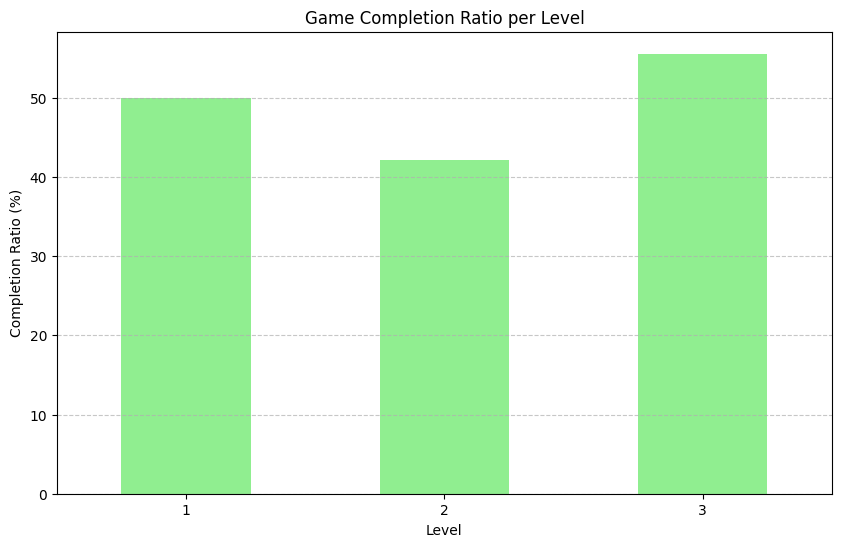

In [51]:
completion_data = []
for event in events_data.values():
    level_index = event.get('level_index')
    if level_index in [4, 5, 6]:  
        
        level = level_index - 3
        completed = event.get('finish')
        completion_data.append((level, completed))
        
df_completion = pd.DataFrame(completion_data, columns=['Level', 'Completed'])
df_completion = df_completion.dropna(subset=['Completed'])


print("Filtered Completion Data DataFrame:")
print(df_completion)

completion_ratio = df_completion.groupby('Level')['Completed'].mean() * 100  

print("\nCompletion Ratio per Level:")
print(completion_ratio)

plt.figure(figsize=(10, 6))
completion_ratio.plot(kind='bar', color='lightgreen')
plt.title("Game Completion Ratio per Level")
plt.xlabel("Level")
plt.ylabel("Completion Ratio (%)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


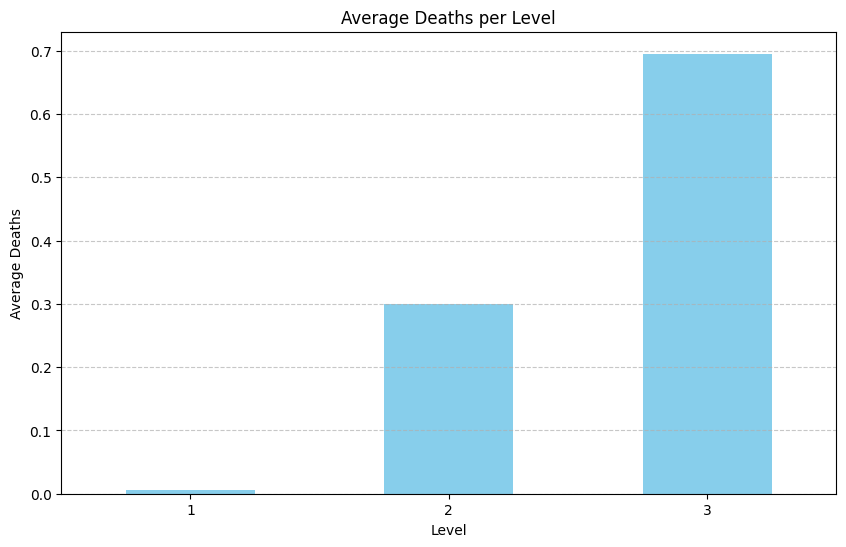

In [52]:
deaths_per_level = []
for session in sessions_data.values():
    crossed_checkpoints = session.get('crossedCheckpoints', [])
    if isinstance(crossed_checkpoints, list):
        for checkpoint in crossed_checkpoints:
            checkpoint_id = checkpoint.get('checkpointID', '')
            
            match = re.match(r'(\d+)[_l](\d+)', checkpoint_id)
            if match:
                level = match.group(1)  
                deaths = checkpoint.get('hitCount', 0)  
                deaths_per_level.append((int(level), deaths))  
                
df_deaths = pd.DataFrame(deaths_per_level, columns=['Level', 'Deaths'])
avg_deaths_per_level = df_deaths.groupby('Level')['Deaths'].mean()

plt.figure(figsize=(10, 6))
avg_deaths_per_level.plot(kind='bar', color='skyblue')
plt.title("Average Deaths per Level")
plt.xlabel("Level")
plt.ylabel("Average Deaths")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


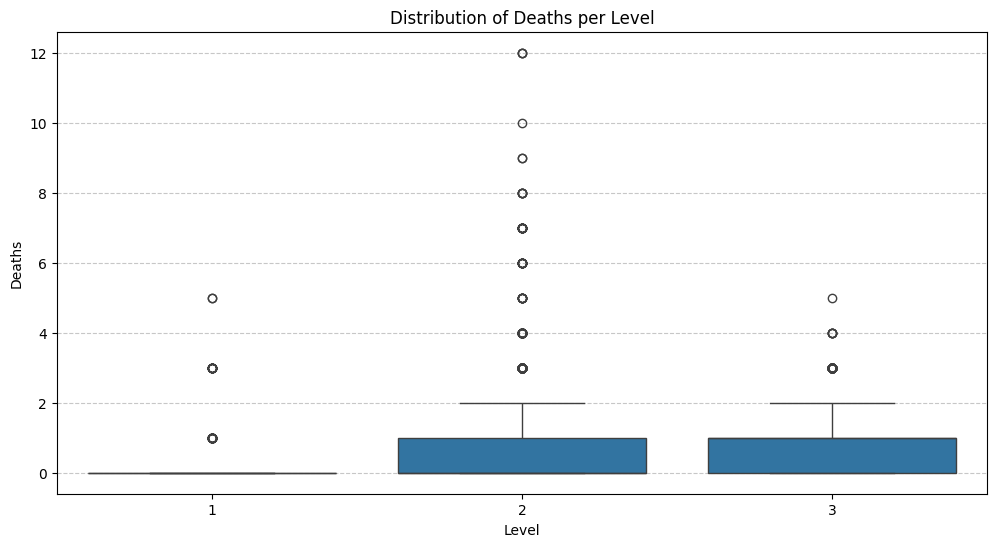

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Level', y='Deaths', data=df_deaths)
plt.title("Distribution of Deaths per Level")
plt.xlabel("Level")
plt.ylabel("Deaths")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

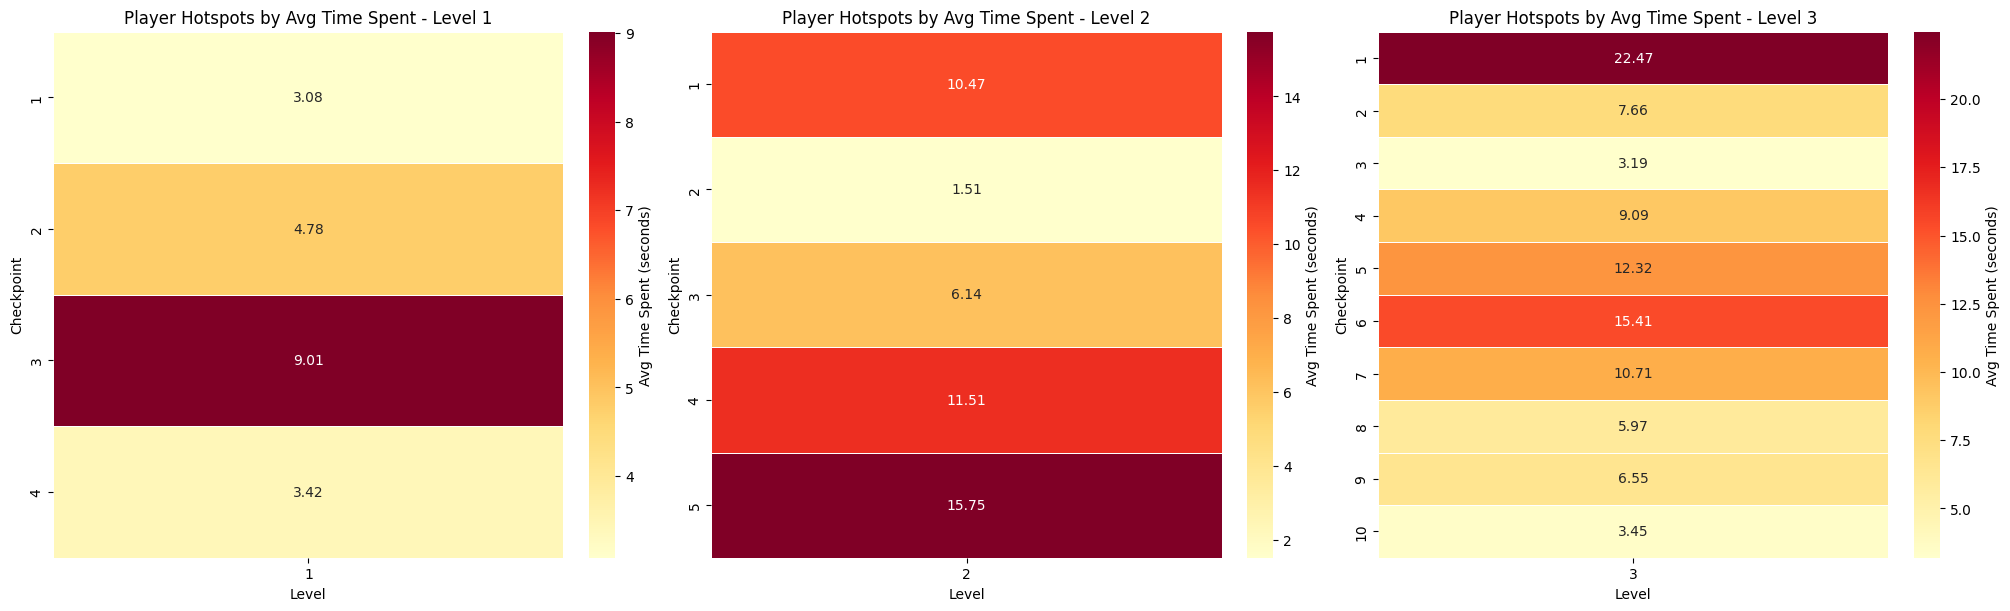

In [54]:

# Initialize dictionaries to hold the total time and count per checkpoint
time_spent_per_checkpoint = {}
checkpoint_counts = {}

# Process the sessions data
for session in sessions_data.values():
    crossed_checkpoints = session.get('crossedCheckpoints', [])
    if isinstance(crossed_checkpoints, list):
        for checkpoint in crossed_checkpoints:
            checkpoint_id = checkpoint.get('checkpointID', '')
            time_taken = checkpoint.get('timeTaken', 0)  # Use timeTaken as per the data structure

            # Standardize and extract level and checkpoint details
            match = re.match(r'(\d+)[_l](\d+)', checkpoint_id)
            if match:
                level = int(match.group(1))
                checkpoint_num = int(match.group(2))

                # Aggregate total time and increment count per checkpoint
                key = (level, checkpoint_num)
                time_spent_per_checkpoint[key] = time_spent_per_checkpoint.get(key, 0) + time_taken
                checkpoint_counts[key] = checkpoint_counts.get(key, 0) + 1

# Calculate the average time spent per checkpoint
avg_time_per_checkpoint = {
    key: time_spent_per_checkpoint[key] / checkpoint_counts[key] for key in time_spent_per_checkpoint
}

# Convert the averaged data to a DataFrame for plotting
df_avg_time_spent = pd.DataFrame(
    [(level, checkpoint, avg_time) for (level, checkpoint), avg_time in avg_time_per_checkpoint.items()],
    columns=['Level', 'Checkpoint', 'AvgTimeSpent']
)

# Set up subplots for 3 side-by-side heatmaps
fig, axs = plt.subplots(1, 3, figsize=(20, 6), constrained_layout=True)

# Create a heatmap for each level separately and place them in the subplots
for idx, level in enumerate([1, 2, 3]):
    level_data = df_avg_time_spent[df_avg_time_spent['Level'] == level].pivot(index='Checkpoint', columns='Level', values='AvgTimeSpent').fillna(0)
    
    sns.heatmap(
        level_data, annot=True, fmt='.2f', cmap='YlOrRd', linewidths=.5, cbar_kws={'label': 'Avg Time Spent (seconds)'},
        ax=axs[idx]
    )
    axs[idx].set_title(f"Player Hotspots by Avg Time Spent - Level {level}")
    axs[idx].set_xlabel("Level")
    axs[idx].set_ylabel("Checkpoint")

plt.show()

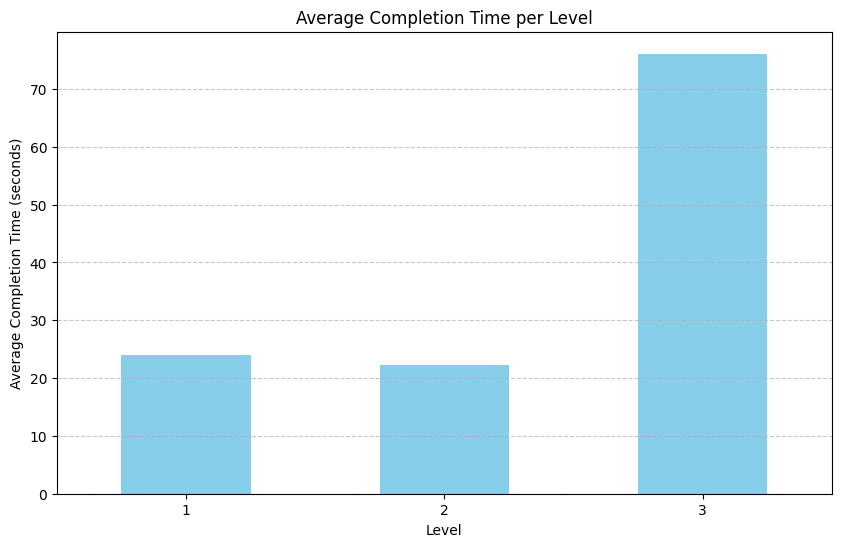

In [55]:

# Process the events data to gather completion time for levels 4, 5, and 6 only
completion_times = []
for event in events_data.values():
    level_index = event.get('level_index')
    completion_time = event.get('completion_time')
    
    # Only include levels 4, 5, and 6 if completion_time is not None
    if level_index in [4, 5, 6] and completion_time is not None:
        # Remap levels 4, 5, 6 to 1, 2, 3
        adjusted_level = level_index - 3
        completion_times.append((adjusted_level, completion_time))

# Convert to DataFrame for easy manipulation
df_completion_times = pd.DataFrame(completion_times, columns=['Level', 'CompletionTime'])

# Calculate the average completion time per level
avg_completion_time = df_completion_times.groupby('Level')['CompletionTime'].mean()

# Plot the average completion time per level
plt.figure(figsize=(10, 6))
avg_completion_time.plot(kind='bar', color='skyblue')
plt.title("Average Completion Time per Level")
plt.xlabel("Level")
plt.ylabel("Average Completion Time (seconds)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()